In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from scipy import stats

## A. Descente de gradient

Le problème est de trouver la valeur de x qui minimise une fonction E(x). Pour trouver analytiquement
le minimum de la fonction E, il faut trouver les racines de l’équation E'(x) = 0, donc trouver ici les racines d’un polynôme de degré 3, ce qui est des fois “difficile". Donc on va utiliser la DG. La DG consiste à construire une suite de valeurs $ x_i $ (avec $ x_0 $ fixé au hasard) de manière itérative :
$ x_{i+1} = x_i − ηE'(x_i)$

### 1. Calcul de l'expression analytique de la fonction $ E(x)= (x-1)(x-2)(x-3)(x-5) $ et sa dérivée

#### - Expression analytique de E(x)

In [4]:
E = lambda x: (x-1)(x-2)(x-3)(x-5)

$ E(x) = (x-1)(x-2)(x-3)(x-5) $ <br />
$ E(x) = (x^2 - 2x -x + 2)(x^2 - 5x -3x + 15) $ <br/>
$ E(x) = (x^2 - 3x + 2)(x^2 - 8x + 15) $ <br/>
$ E(x) = x^4 - 8x^3 + 15x^2 - 3x^3 + 24x^2 - 45x + 2x^2 - 16x + 30 $ <br/>
$ E(x) = x^4 - 11x^3 + 41x^2 - 61x + 30 $

#### - dérivée de la fonction E

$ E'(x) = 4x^3 - 33x^2 + 82x -  61 $

In [5]:
dg = lambda x: (4*x*x*x) - (33*x*x) + (82*x) - 61 # gradient d'une fonction E

### 2. Implémentation de  l'algorithme de la descente de gradient pour la fonction E(x)

In [6]:
def algoDG(x0, n, precision, max_iters, dg):
    iters = 0 
    dif_val_consec = 1
    x_courant = x0

    while dif_val_consec > precision and iters < max_iters:
        x_precedent = x_courant # Stocke la valeur courante dans la variable contenant la valeur précédente
        x_courant = x_courant - n * dg(x_precedent) #descente de gradient
        dif_val_consec = abs(x_courant - x_precedent) # calcul de la différence entre 2 valeurs consécutives
        iters = iters+1
        print("A l'iteration ",iters," La valeur de X c'est : ",x_courant) #affichage de l'itération courante
       
    print("Le minimum local définitif c'est ", x_courant)
    print("Le nombre d'itération total est ", iters)

### 3. Test de l'algo implémenté

In [9]:
n = 0.01 # taux d'apprentissage
max_iters = 1000 # nombre maximum d'itérations
precision = 0.01

#### a.  $x_0 = 5$ et $ n = 0.001 $

In [10]:
x0 = 5 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage

algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  4.976
A l'iteration  2  La valeur de X c'est :  4.953232503296
A l'iteration  3  La valeur de X c'est :  4.931605767917654
A l'iteration  4  La valeur de X c'est :  4.911037247899635
A l'iteration  5  La valeur de X c'est :  4.891452439321794
A l'iteration  6  La valeur de X c'est :  4.872783898886173
A l'iteration  7  La valeur de X c'est :  4.854970405290911
A l'iteration  8  La valeur de X c'est :  4.837956239433833
A l'iteration  9  La valeur de X c'est :  4.821690564011287
A l'iteration  10  La valeur de X c'est :  4.8061268866613895
A l'iteration  11  La valeur de X c'est :  4.7912225936523525
A l'iteration  12  La valeur de X c'est :  4.776938543399458
A l'iteration  13  La valeur de X c'est :  4.763238710932537
A l'iteration  14  La valeur de X c'est :  4.750089875924174
A l'iteration  15  La valeur de X c'est :  4.7374613481002825
A l'iteration  16  La valeur de X c'est :  4.725324724845548
A l'iteration  17  La valeur de X c'est :  4.

#### b.  $x_0 = 5$ et $ n = 0.01 $

In [11]:
x0 = 5 # L'algorithme commence à 5
n = 0.01 # taux d'apprentissage

algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  4.76
A l'iteration  2  La valeur de X c'est :  4.629800959999999
A l'iteration  3  La valeur de X c'est :  4.547331073499857
A l'iteration  4  La valeur de X c'est :  4.491103683210367
A l'iteration  5  La valeur de X c'est :  4.45107805974022
A l'iteration  6  La valeur de X c'est :  4.421778281708051
A l'iteration  7  La valeur de X c'est :  4.399914593427816
A l'iteration  8  La valeur de X c'est :  4.38337502123564
A l'iteration  9  La valeur de X c'est :  4.3707371747511905
A l'iteration  10  La valeur de X c'est :  4.361008294913719
Le minimum local définitif c'est  4.361008294913719
Le nombre d'itération total est  10


#### c.  $x_0 = 5$ et $ n = 0.1 $

In [12]:
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage

algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  2.5999999999999996
A l'iteration  2  La valeur de X c'est :  2.657599999999999
A l'iteration  3  La valeur de X c'est :  2.764565555609596
A l'iteration  4  La valeur de X c'est :  2.9648091807034205
A l'iteration  5  La valeur de X c'est :  3.3363024391737808
A l'iteration  6  La valeur de X c'est :  3.9562003590354293
A l'iteration  7  La valeur de X c'est :  4.497155997419324
A l'iteration  8  La valeur de X c'est :  4.0801022283101105
A l'iteration  9  La valeur de X c'est :  4.490169863412527
A l'iteration  10  La valeur de X c'est :  4.092491699488935
A l'iteration  11  La valeur de X c'est :  4.486851432256319
A l'iteration  12  La valeur de X c'est :  4.09830527306302
A l'iteration  13  La valeur de X c'est :  4.485124103950299
A l'iteration  14  La valeur de X c'est :  4.101313215862983
A l'iteration  15  La valeur de X c'est :  4.484187481996711
A l'iteration  16  La valeur de X c'est :  4.102939038859919
A l'iteration  17  La valeur 

A l'iteration  522  La valeur de X c'est :  4.104990789406446
A l'iteration  523  La valeur de X c'est :  4.4830024730551825
A l'iteration  524  La valeur de X c'est :  4.104990789406446
A l'iteration  525  La valeur de X c'est :  4.4830024730551825
A l'iteration  526  La valeur de X c'est :  4.104990789406446
A l'iteration  527  La valeur de X c'est :  4.4830024730551825
A l'iteration  528  La valeur de X c'est :  4.104990789406446
A l'iteration  529  La valeur de X c'est :  4.4830024730551825
A l'iteration  530  La valeur de X c'est :  4.104990789406446
A l'iteration  531  La valeur de X c'est :  4.4830024730551825
A l'iteration  532  La valeur de X c'est :  4.104990789406446
A l'iteration  533  La valeur de X c'est :  4.4830024730551825
A l'iteration  534  La valeur de X c'est :  4.104990789406446
A l'iteration  535  La valeur de X c'est :  4.4830024730551825
A l'iteration  536  La valeur de X c'est :  4.104990789406446
A l'iteration  537  La valeur de X c'est :  4.4830024730551825


#### d.  $x_0 = 5$ et $ n = 0.17 $

In [13]:
x0 = 5 # L'algorithme commence à 5
n = 0.17 # taux d'apprentissage

algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  0.9199999999999999
A l'iteration  2  La valeur de X c'est :  2.6839961599999995
A l'iteration  3  La valeur de X c'est :  2.9047609794051406
A l'iteration  4  La valeur de X c'est :  3.451197397853174
A l'iteration  5  La valeur de X c'est :  4.578539559686727
A l'iteration  6  La valeur de X c'est :  3.459840406222077
A l'iteration  7  La valeur de X c'est :  4.591262614085011
A l'iteration  8  La valeur de X c'est :  3.404101646457611
A l'iteration  9  La valeur de X c'est :  4.505525281592863
A l'iteration  10  La valeur de X c'est :  3.7566158389185724
A l'iteration  11  La valeur de X c'est :  4.879121101585747
A l'iteration  12  La valeur de X c'est :  1.8018238715523558
A l'iteration  13  La valeur de X c'est :  1.2898253932172163
A l'iteration  14  La valeur de X c'est :  1.553577507744591
A l'iteration  15  La valeur de X c'est :  1.2572110635079818
A l'iteration  16  La valeur de X c'est :  1.617497602270987
A l'iteration  17  La vale

A l'iteration  550  La valeur de X c'est :  1.6583937769962647
A l'iteration  551  La valeur de X c'est :  1.2378980211216388
A l'iteration  552  La valeur de X c'est :  1.6583937769962573
A l'iteration  553  La valeur de X c'est :  1.2378980211216364
A l'iteration  554  La valeur de X c'est :  1.6583937769962647
A l'iteration  555  La valeur de X c'est :  1.2378980211216388
A l'iteration  556  La valeur de X c'est :  1.6583937769962573
A l'iteration  557  La valeur de X c'est :  1.2378980211216364
A l'iteration  558  La valeur de X c'est :  1.6583937769962647
A l'iteration  559  La valeur de X c'est :  1.2378980211216388
A l'iteration  560  La valeur de X c'est :  1.6583937769962573
A l'iteration  561  La valeur de X c'est :  1.2378980211216364
A l'iteration  562  La valeur de X c'est :  1.6583937769962647
A l'iteration  563  La valeur de X c'est :  1.2378980211216388
A l'iteration  564  La valeur de X c'est :  1.6583937769962573
A l'iteration  565  La valeur de X c'est :  1.237898021

#### e.  $x_0 = 5$ et $ n = 1 $

In [14]:
x0 = 5 # L'algorithme commence à 5
n = 1 # taux d'apprentissage

algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  -19
A l'iteration  2  La valeur de X c'est :  40949
A l'iteration  3  La valeur de X c'est :  -274601175398371
A l'iteration  4  La valeur de X c'est :  82826091321781763715868804625926781624913509
A l'iteration  5  La valeur de X c'est :  -2272801419601565907454709119863388960111661329217602037652370291086066385553736792618437234801289772553602068922219366970093504047411
A l'iteration  6  La valeur de X c'est :  46961771086927128600681913677744287202054065225705623409119633725104515108960278848670780081214426918416213672480155769222707756723870757602611135985318277676951240922794244424406472682494231644426785929474925029874629149904755411530722947922655314815784777289905769824562811187272921694112844718730038178820173867365523894823215046171117181166806491889908929753821620644046286945734461630054486869
A l'iteration  7  La valeur de X c'est :  -414279452006470005794982572761676120280205025488522243118196985064659523156570538305817106165351286

A l'iteration  12  La valeur de X c'est :  710482647742994751157194644175721484443173324607627756453093862882257071598055666054387509367548563408872522217624011400350696158407793311615619389538160820604059068110853138240257574316560041822858768439985313065930162760718928578813089874437521194982844794113056726710620538023941593063298674455929237094440706377651919690546433569851647526646254890455008915470974889202723865389358546209832667829788328919811168813439789598087819270082015479922626310173759784527127529585771554144431431480223555215190200374405009650112956208587519414251955538517710000482981823356335965240632400494887453526504082715904177189925942777489696906203917473941398196826498951942946363448006128707161686455668532850284969309629491770722797304753795247738853830212969614723713631572098394844459254884556643080794851255701461766982788755052607060597720863289088902786480261450779949110965413927724932924713959141762661254934535485417824698396024241525553184843420491803404352769

KeyboardInterrupt: 

#### f.  $x_0 = 0$ et $ n = 0.001 $

In [15]:
x0 = 0 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
algoDG(x0, n, precision, max_iters, dg)

A l'iteration  1  La valeur de X c'est :  0.061
A l'iteration  2  La valeur de X c'est :  0.117119885076
A l'iteration  3  La valeur de X c'est :  0.16896229156114767
A l'iteration  4  La valeur de X c'est :  0.2170301817851354
A l'iteration  5  La valeur de X c'est :  0.2617471858632089
A l'iteration  6  La valeur de X c'est :  0.3034730682067661
A l'iteration  7  La valeur de X c'est :  0.34251564691183195
A l'iteration  8  La valeur de X c'est :  0.3791400922323101
A l'iteration  9  La valeur de X c'est :  0.4135762612628828
A l'iteration  10  La valeur de X c'est :  0.44602454238514505
A l'iteration  11  La valeur de X c'est :  0.4766605556293884
A l'iteration  12  La valeur de X c'est :  0.5056389652923262
A l'iteration  13  La valeur de X c'est :  0.5330965969239939
A l'iteration  14  La valeur de X c'est :  0.5591550042575736
A l'iteration  15  La valeur de X c'est :  0.5839225975205916
A l'iteration  16  La valeur de X c'est :  0.6074964192454206
A l'iteration  17  La valeur de

### 4. Constat suite à l'affichage du minimum trouvé et du nombre d'itération

Suite à l'affichage du minimum et du nombre d'itérations, nous constatons que : 
- Quand le taux d'apprentissage est inférieur ou égale à la précision,
    - le temps de calcul est très faible
    - on a moins d'itérations et surtout le plus faible nombre d'itérations quand ce taux est égal à la précision
    - Les valeurs de x décroissent de la valeur initiale à la valeur minimale; ce qui correspond au fonctionnement              normal de l'algorithme de la descente de gradient
    - La valeur minimale correspond à la valeur de la dernière itération
- Quand le taux d'apprentissage est supérieur à la précision,
    - le temps de calcul est très élevé
    - on a beaucoup plus d'itérations, pouvant atteindre le maximum d'itérations défini
    - les valeurs de x ne sont pas décroissantes
- Quand le nombre d'itérations est égale à 0,
    - le temps de calcul est satisfaisant
    - on a moins d'itérations
    - les valeurs de x ne sont pas décroissantes
    
On en déduit que pour avoir un résultat optimal du minimum d'une fonction par l'algorithme de descente de gradient, il faut faire le bon choix du taux d'apprentissage et de la valeur initiale.

### 5. Visualisation de l'évolution des minimums de la fonction E(x) trouvés au cours d'itération 

In [16]:
def visuMinimum(x0, n, precision, max_iters, dg, titre):
    iters = 0 
    dif_val_consec = 1
    x_courant = x0
   
    while dif_val_consec > precision and iters < max_iters:
        x_precedent = x_courant # Stocke la valeur courante dans la variable contenant la valeur précédente
        x_courant = x_courant - n * dg(x_precedent) #descente de gradient
        dif_val_consec = abs(x_courant - x_precedent) # calcul de la différence entre 2 valeurs consécutives
        iters = iters+1
        plt.title(titre)
        plt.scatter(iters,x_courant)
        plt.xlabel('**** itérations ****')
        plt.ylabel('**** Valeurs minimums ****')

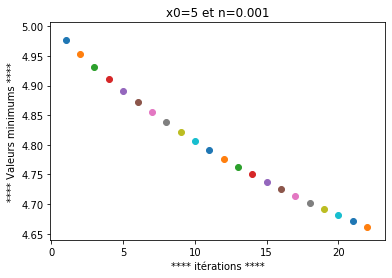

In [17]:
#a)
x0 = 5 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
titre = "x0=5 et n=0.001"
visuMinimum(x0, n, precision, max_iters, dg, titre)

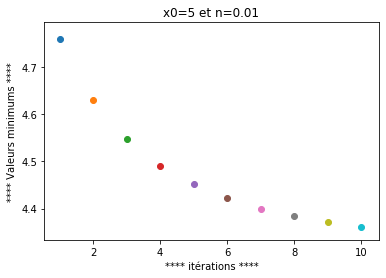

In [18]:
#b)
x0 = 5 # L'algorithme commence à 5
n = 0.01 # taux d'apprentissage
titre = "x0=5 et n=0.01"
visuMinimum(x0, n, precision, max_iters, dg, titre)

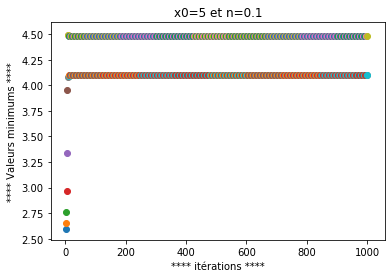

In [19]:
#c)
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage
titre = "x0=5 et n=0.1"
visuMinimum(x0, n, precision, max_iters, dg, titre)

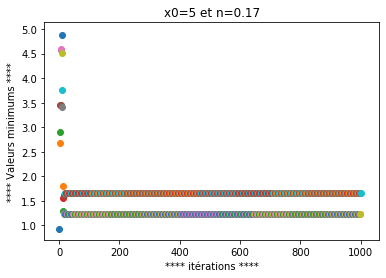

In [20]:
#d)
x0 = 5 # L'algorithme commence à 5
n = 0.17 # taux d'apprentissage
titre = "x0=5 et n=0.17"
visuMinimum(x0, n, precision, max_iters, dg, titre)

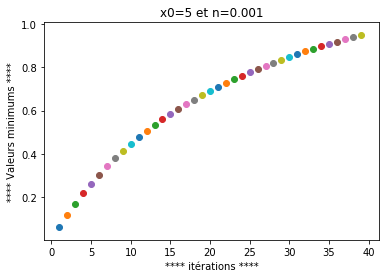

In [21]:
#f)
x0 = 0 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
titre = "x0=5 et n=0.001"
visuMinimum(x0, n, precision, max_iters, dg, titre)

### 6. Test avec d'autres valeurs de la précision et le nombre maximum d'itérations

In [22]:
def algoDG_v2(x0, n, precision, max_iters, dg):
    iters = 0 
    dif_val_consec = 1
    x_courant = x0

    while dif_val_consec > precision and iters < max_iters:
        x_precedent = x_courant # Stocke la valeur courante dans la variable contenant la valeur précédente
        x_courant = x_courant - n * dg(x_precedent) #descente de gradient
        dif_val_consec = abs(x_courant - x_precedent) # calcul de la différence entre 2 valeurs consécutives
        iters = iters+1
        #print("A l'iteration ",iters," La valeur de X c'est : ",x_courant) #affichage de l'itération courante
       
    print("Le minimum local définitif c'est ", x_courant)
    print("Le nombre d'itération total est ", iters)

Pour x0=5 et n=0.001
Le minimum local définitif c'est  4.376888058021918
Le nombre d'itération total est  100


Pour x0=5 et n=0.01
Le minimum local définitif c'est  4.326717751020479
Le nombre d'itération total est  29


Pour x0=5 et n=0.1
Le minimum local définitif c'est  4.10499078940635
Le nombre d'itération total est  100


Pour x0=5 et n=0.17
Le minimum local définitif c'est  1.6583937769962573
Le nombre d'itération total est  100


Pour x0=5 et n=1
Le minimum local définitif c'est  4.10499078940635
Le nombre d'itération total est  100


Pour x0=0 et n=0.001
Le minimum local définitif c'est  1.245924944971239
Le nombre d'itération total est  100




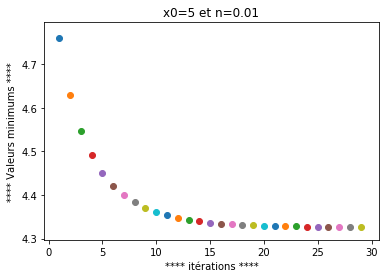

In [23]:
precision = 0.0001 # Nous dit quand l'algorithme s'arrête
max_iters = 100 # nombre maximum d'itérations#a)

#a)
x0 = 5 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
print("Pour x0=5 et n=0.001")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#b)
x0 = 5 # L'algorithme commence à 5
n = 0.01 # taux d'apprentissage
print("Pour x0=5 et n=0.01")
titre = "x0=5 et n=0.01"
algoDG_v2(x0, n, precision, max_iters, dg)
visuMinimum(x0, n, precision, max_iters, dg, titre)
print("\n")

#c)
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage
print("Pour x0=5 et n=0.1")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#d)
x0 = 5 # L'algorithme commence à 5
n = 0.17 # taux d'apprentissage
print("Pour x0=5 et n=0.17")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#e)
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage
print("Pour x0=5 et n=1")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#f)
x0 = 0 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
print("Pour x0=0 et n=0.001")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

Pour x0=5 et n=0.001
Le minimum local définitif c'est  4.33090785154861
Le nombre d'itération total est  211


Pour x0=5 et n=0.01
Le minimum local définitif c'est  4.326717751020479
Le nombre d'itération total est  29


Pour x0=5 et n=0.1
Le minimum local définitif c'est  4.104990789406446
Le nombre d'itération total est  10000


Pour x0=5 et n=0.17
Le minimum local définitif c'est  1.6583937769962573
Le nombre d'itération total est  10000


Pour x0=5 et n=1
Le minimum local définitif c'est  4.104990789406446
Le nombre d'itération total est  10000


Pour x0=0 et n=0.001
Le minimum local définitif c'est  1.3855190366876966
Le nombre d'itération total est  312




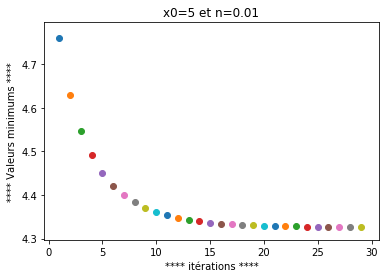

In [24]:
precision = 0.0001 # Nous dit quand l'algorithme s'arrête
max_iters = 10000 # nombre maximum d'itérations#a)

#a)
x0 = 5 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
print("Pour x0=5 et n=0.001")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#b)
x0 = 5 # L'algorithme commence à 5
n = 0.01 # taux d'apprentissage
print("Pour x0=5 et n=0.01")
titre = "x0=5 et n=0.01"
algoDG_v2(x0, n, precision, max_iters, dg)
visuMinimum(x0, n, precision, max_iters, dg, titre)
print("\n")

#c)
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage
print("Pour x0=5 et n=0.1")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#d)
x0 = 5 # L'algorithme commence à 5
n = 0.17 # taux d'apprentissage
print("Pour x0=5 et n=0.17")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#e)
x0 = 5 # L'algorithme commence à 5
n = 0.1 # taux d'apprentissage
print("Pour x0=5 et n=1")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

#f)
x0 = 0 # L'algorithme commence à 5
n = 0.001 # taux d'apprentissage
print("Pour x0=0 et n=0.001")
algoDG_v2(x0, n, precision, max_iters, dg)
#visuMinimum(x0, n, precision, max_iters, dg)
print("\n")

Les constats faits à la question 4 se confirment quand on a changé les valeurs de la précision et des itérations.
Dans la majorité des cas, le cas où $ x_0 = 5 $ et $ n = 0.01 $, nous donne des meilleurs résultats par rapport aux autres. Ainsi, le nombre d'itérations maximum dépend peut influencer sur l'algorithme car dans le cas où on a $x0 = 5 $ et $ n = 1 $, le temps de calcul était très long voire interminable pour un nombre d'itération égale à 1000 mais quand on a pris le nombre maximal à 100 et 10000 on a obtenu le temps de calcul a été réduit.

## B. Descente de grandient pour la régression linéaire

Soit le modele de regression lineaire $ y_{pred} = ax_i  + b $ où a et b sont des coefficients de régressions inconnus à estimer. $ x_i $ correspond aux données de régression et y c'est le vecteur des données de sortie $ y_i $.
La fonction de coût à minimiser est $ E(a,b) = \sum_{i=1}^n (y_{pred} - y_i )^2$

### 1. Calcul des dérivées partielles de E selon a et b

$ E(a,b) = \sum_{i=1}^n (y_{pred} - y_i )^2$<br/>
$ E(a,b) = \sum_{i=1}^n (ax_i + b - y_i )^2$<br/>

In [25]:
def E(a,b, x, y):
    t=0
    for i in range(1, len(x)):
        t = t + (a*x[i] + b - y[i])*(a*x[i] + b - y[i])
    return t

#### - Selon a

$\frac{\partial E(a,b)}{\partial a} = \sum_{i=1}^n \frac{\partial}{\partial a}(y_{pred_i} - y_i)^2  $ <br />
$ \frac{\partial E(a,b)}{\partial a} = \sum_{i=1}^n \frac{\partial}{\partial a}(ax_i + b - y_i)^2  $ <br />
$ \frac{\partial E(a,b)}{\partial a} = 2\sum_{i=1}^n (\frac{\partial}{\partial a}(ax_i + b - y_i))(ax_i + b - y_i)  $ <br />
$ \frac{\partial E(a,b)}{\partial a} = 2\sum_{i=1}^n (x_i)(ax_i + b - y_i)  $

In [26]:
# dérivée partielle selon a
def devA(a, b, x, y):
    t = 0
    for i in range(1, len(x)):
        t = t + (2*x[i])*((a*x[i]) + b - y[i])
    return t

#### - Selon b

$\frac{\partial E(a,b)}{\partial b} = \sum_{i=1}^n \frac{\partial}{\partial b}(y_{pred_i} - y_i)^2  $ <br />
$ \frac{\partial E(a,b)}{\partial b} = \sum_{i=1}^n \frac{\partial}{\partial b}(ax_i + b - y_i)^2  $ <br />
$ \frac{\partial E(a,b)}{\partial b} = 2\sum_{i=1}^n (\frac{\partial}{\partial b}(ax_i + b - y_i))(ax_i + b - y_i)  $ <br />
$ \frac{\partial E(a,b)}{\partial b} = 2\sum_{i=1}^n (ax_i + b - y_i)  $

In [27]:
# dérivée partielle selon b
def devB(a, b, x, y):
    t = 0
    for i in range(1, len(x)):
        t = t + 2*((a*x[i]) + b - y[i])
    return t

### 2. Implémentation de l'algorithme DG pour la fonction E(a,b)

Contrairement au cas précédent, les règles de mis à jour de la DG deviennent : <br/>
    $ a_{i+1} = a_i -n\frac{\partial E(a,b)}{\partial a}(a_i)$ <br/> 
    et <br/> 
    $ b_{i+1} = b_i -n\frac{\partial E(a,b)}{\partial b}(b_i) $

In [33]:
def gradient2D(a0, b0, taux, precision, max_iters, X, Y):
    iter_a= 0
    iter_b=0
    a_cur = a0
    b_cur = b0
    dic_a = {}
    dic_b ={}
    dif_val_a = 1
    dif_val_b = 1
        
    for i in range(max_iters):
        a_prec = a_cur
        b_prec = b_cur
        if dif_val_a > precision:
            a_cur = a_prec - taux * devA(a_prec, b_prec, X, Y) # maj a
            dif_val_a = abs(a_cur - a_prec)
            dic_a[iter_a] = a_cur[0]
            iter_a = iter_a + 1
        if dif_val_b > precision:
            b_cur = b_prec - taux * devB(a_prec, b_prec, X, Y)  # maj b
            dif_val_b = abs(b_cur - b_prec)
            dic_b[iter_b] = b_cur[0]
            iter_b = iter_b + 1
        #iters = iters+1
    return (dic_a, dic_b)

In [29]:
def gradient2D_v(a0, b0, taux, precision, max_iters, X, Y):
    iter_a= 0
    iter_b=0
    a_cur = a0
    b_cur = b0
    a_min= {}
    b_min={}
    dif_val_a = 1
    dif_val_b = 1
    iters=0
        
    for i in range(max_iters):
        a_prec = a_cur
        b_prec = b_cur
        #if dif_val_a > precision:
        a_cur = a_prec - taux * devA(a_prec, b_prec, X, Y) # maj a
        #dif_val_a = abs(a_cur - a_prec)
        a_min[iters] = a_cur[0]
        #iter_a = iter_a + 1
        #if dif_val_b > precision:
        b_cur = b_prec - taux * devB(a_prec, b_prec, X, Y)  # maj b
        #dif_val_b = abs(b_cur - b_prec)
        b_min[iters] = b_cur[0]
        #iter_b = iter_b + 1
        iters = iters+1
    return (a_min, b_min)

### 3.

In [30]:
X, Y = datasets.make_regression(n_samples=100,#nombre d'échantillons
                                      n_features=1 #nombre de variable
                               )

In [31]:
a = 0
b = 1
precision = 0.000001 

In [35]:
#a) 
taux = 0.001  # taux d'apprentissage
max_iter = 100  # nombre maximum d'itérations

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

for i in min_a:
    print("A l'iteration ",i," a est égale à ",min_a[i])

for i in min_b:
    print("A l'iteration ",i," b est égale à ",min_b[i])

A l'iteration  0  a est égale à  18.500306100279698
A l'iteration  1  a est égale à  33.15880909942448
A l'iteration  2  a est égale à  44.797186772369635
A l'iteration  3  a est égale à  54.05696876186838
A l'iteration  4  a est égale à  61.439823380619856
A l'iteration  5  a est égale à  67.33869680824323
A l'iteration  6  a est égale à  72.0619054506217
A l'iteration  7  a est égale à  75.85179578281604
A l'iteration  8  a est égale à  78.89921285805765
A l'iteration  9  a est égale à  81.3547323310286
A l'iteration  10  a est égale à  83.33739102791978
A l'iteration  11  a est égale à  84.94148226872997
A l'iteration  12  a est égale à  86.24185241744031
A l'iteration  13  a est égale à  87.29803539548786
A l'iteration  14  a est égale à  88.1574851662112
A l'iteration  15  a est égale à  88.85810713612048
A l'iteration  16  a est égale à  89.43024392474123
A l'iteration  17  a est égale à  89.89823588602883
A l'iteration  18  a est égale à  90.28164971064194
A l'iteration  19  a e

In [36]:
#b) 
taux = 0.001  # taux d'apprentissage
max_iter = 500  # nombre maximum d'itérations

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

for i in min_a:
    print("A l'iteration ",i," a est égale à ",min_a[i])

for i in min_b:
    print("A l'iteration ",i," b est égale à ",min_b[i])

A l'iteration  0  a est égale à  18.500306100279698
A l'iteration  1  a est égale à  33.15880909942448
A l'iteration  2  a est égale à  44.797186772369635
A l'iteration  3  a est égale à  54.05696876186838
A l'iteration  4  a est égale à  61.439823380619856
A l'iteration  5  a est égale à  67.33869680824323
A l'iteration  6  a est égale à  72.0619054506217
A l'iteration  7  a est égale à  75.85179578281604
A l'iteration  8  a est égale à  78.89921285805765
A l'iteration  9  a est égale à  81.3547323310286
A l'iteration  10  a est égale à  83.33739102791978
A l'iteration  11  a est égale à  84.94148226872997
A l'iteration  12  a est égale à  86.24185241744031
A l'iteration  13  a est égale à  87.29803539548786
A l'iteration  14  a est égale à  88.1574851662112
A l'iteration  15  a est égale à  88.85810713612048
A l'iteration  16  a est égale à  89.43024392474123
A l'iteration  17  a est égale à  89.89823588602883
A l'iteration  18  a est égale à  90.28164971064194
A l'iteration  19  a e

In [37]:
#c) 
taux = 0.001  # taux d'apprentissage
max_iter = 1000  # nombre maximum d'itérations

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

for i in min_a:
    print("A l'iteration ",i," a est égale à ",min_a[i])

for i in min_b:
    print("A l'iteration ",i," b est égale à ",min_b[i])

A l'iteration  0  a est égale à  18.500306100279698
A l'iteration  1  a est égale à  33.15880909942448
A l'iteration  2  a est égale à  44.797186772369635
A l'iteration  3  a est égale à  54.05696876186838
A l'iteration  4  a est égale à  61.439823380619856
A l'iteration  5  a est égale à  67.33869680824323
A l'iteration  6  a est égale à  72.0619054506217
A l'iteration  7  a est égale à  75.85179578281604
A l'iteration  8  a est égale à  78.89921285805765
A l'iteration  9  a est égale à  81.3547323310286
A l'iteration  10  a est égale à  83.33739102791978
A l'iteration  11  a est égale à  84.94148226872997
A l'iteration  12  a est égale à  86.24185241744031
A l'iteration  13  a est égale à  87.29803539548786
A l'iteration  14  a est égale à  88.1574851662112
A l'iteration  15  a est égale à  88.85810713612048
A l'iteration  16  a est égale à  89.43024392474123
A l'iteration  17  a est égale à  89.89823588602883
A l'iteration  18  a est égale à  90.28164971064194
A l'iteration  19  a e

In [39]:
#d) 
taux = 0.01  # taux d'apprentissage
max_iter = 1000  # nombre maximum d'itérations

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

for i in min_a:
    print("A l'iteration ",i," a est égale à ",min_a[i])

for i in min_b:
    print("A l'iteration ",i," b est égale à ",min_b[i])

A l'iteration  0  a est égale à  185.00306100279698
A l'iteration  1  a est égale à  -14.174188107896498
A l'iteration  2  a est égale à  224.14602760318294
A l'iteration  3  a est égale à  -79.83983874893372
A l'iteration  4  a est égale à  321.2635569215563
A l'iteration  5  a est égale à  -216.87449129505103
A l'iteration  6  a est égale à  510.8344020878002
A l'iteration  7  a est égale à  -476.8442228326819
A l'iteration  8  a est égale à  865.9481539933481
A l'iteration  9  a est égale à  -961.0574858994632
A l'iteration  10  a est égale à  1525.6565010040795
A l'iteration  11  a est égale à  -1859.5314128805012
A l'iteration  12  a est égale à  2749.102882141937
A l'iteration  13  a est égale à  -3525.360764809181
A l'iteration  14  a est égale à  5017.1943328950865
A l'iteration  15  a est égale à  -6613.404962049518
A l'iteration  16  a est égale à  9221.58631961251
A l'iteration  17  a est égale à  -12337.69198785509
A l'iteration  18  a est égale à  17015.20084920152
A l'ite

A l'iteration  701  a est égale à  -5.781660230666783e+95
A l'iteration  702  a est égale à  7.871717678539819e+95
A l'iteration  703  a est égale à  -1.0717326293574019e+96
A l'iteration  704  a est égale à  1.45916161597197e+96
A l'iteration  705  a est égale à  -1.9866453285112235e+96
A l'iteration  706  a est égale à  2.704813242134572e+96
A l'iteration  707  a est égale à  -3.6825972758353904e+96
A l'iteration  708  a est égale à  5.013848085603062e+96
A l'iteration  709  a est égale à  -6.826343133000561e+96
A l'iteration  710  a est égale à  9.29405115070595e+96
A l'iteration  711  a est égale à  -1.2653830185352836e+97
A l'iteration  712  a est égale à  1.722816194610508e+97
A l'iteration  713  a est égale à  -2.34561045702027e+97
A l'iteration  714  a est égale à  3.193543474512496e+97
A l'iteration  715  a est égale à  -4.348002411516027e+97
A l'iteration  716  a est égale à  5.919795713266471e+97
A l'iteration  717  a est égale à  -8.059788834061212e+97
A l'iteration  718  a

A l'iteration  293  b est égale à  1.1706953832907222e+41
A l'iteration  294  b est égale à  -1.593899187633815e+41
A l'iteration  295  b est égale à  2.170090235769594e+41
A l'iteration  296  b est égale à  -2.9545730796021003e+41
A l'iteration  297  b est égale à  4.022644744822623e+41
A l'iteration  298  b est égale à  -5.476821966180067e+41
A l'iteration  299  b est égale à  7.456681052394329e+41
A l'iteration  300  b est égale à  -1.0152254840578212e+42
A l'iteration  301  b est égale à  1.3822272620195895e+42
A l'iteration  302  b est égale à  -1.881899374938618e+42
A l'iteration  303  b est égale à  2.5622018568927438e+42
A l'iteration  304  b est égale à  -3.488432188718248e+42
A l'iteration  305  b est égale à  4.74949274685308e+42
A l'iteration  306  b est égale à  -6.466423921142171e+42
A l'iteration  307  b est égale à  8.804021935947839e+42
A l'iteration  308  b est égale à  -1.1986656488020646e+43
A l'iteration  309  b est égale à  1.6319806425645733e+43
A l'iteration  31

A l'iteration  882  b est égale à  -1.0102379541762185e+120
A l'iteration  883  b est égale à  1.3754367510634092e+120
A l'iteration  884  b est égale à  -1.8726541092177863e+120
A l'iteration  885  b est égale à  2.5496144479627863e+120
A l'iteration  886  b est égale à  -3.471294459165162e+120
A l'iteration  887  b est égale à  4.726159765786931e+120
A l'iteration  888  b est égale à  -6.434656118776817e+120
A l'iteration  889  b est égale à  8.760770142948768e+120
A l'iteration  890  b est égale à  -1.19277692670502e+121
A l'iteration  891  b est égale à  1.6239631603906034e+121
A l'iteration  892  b est égale à  -2.211022268506746e+121
A l'iteration  893  b est égale à  3.010301952081772e+121
A l'iteration  894  b est égale à  -4.0985194820436886e+121
A l'iteration  895  b est égale à  5.580125253905211e+121
A l'iteration  896  b est égale à  -7.597328251260175e+121
A l'iteration  897  b est égale à  1.0343745692267646e+122
A l'iteration  898  b est égale à  -1.4082986993297083e+12

In [40]:
#e) 
taux = 1  # taux d'apprentissage
max_iter = 1000  # nombre maximum d'itérations

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

for i in min_a:
    print("A l'iteration ",i," a est égale à ",min_a[i])

for i in min_b:
    print("A l'iteration ",i," b est égale à ",min_b[i])

A l'iteration  0  a est égale à  18500.306100279697
A l'iteration  1  a est égale à  -3804802.488934346
A l'iteration  2  a est égale à  810207866.5501596
A l'iteration  3  a est égale à  -176884397899.6646
A l'iteration  4  a est égale à  39394239919219.8
A l'iteration  5  a est égale à  -8908570186933099.0
A l'iteration  6  a est égale à  2.0375740338734664e+18
A l'iteration  7  a est égale à  -4.6989407322546425e+20
A l'iteration  8  a est égale à  1.0900448176731699e+23
A l'iteration  9  a est égale à  -2.5391811093840684e+25
A l'iteration  10  a est égale à  5.932063826481121e+27
A l'iteration  11  a est égale à  -1.3886608399120802e+30
A l'iteration  12  a est égale à  3.255328313036873e+32
A l'iteration  13  a est égale à  -7.6385939395109815e+34
A l'iteration  14  a est égale à  1.7935831812939503e+37
A l'iteration  15  a est égale à  -4.213362676486967e+39
A l'iteration  16  a est égale à  9.900865143810392e+41
A l'iteration  17  a est égale à  -2.327081371215029e+44
A l'itera

/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in add
  """
/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


### 4. Affichage des coefficients trouvés, ainsi que la valeur de E(a min , b min ) et le nombre d’itérations. Que constatez-vous ?

In [58]:
#a) 
taux = 0.001  
max_iter = 100  
a = 4
b = 3

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

print("Les coefficients trouvés sont : ")
print("a = ", min_a[len(min_a)-1])
print("b = ", min_b[len(min_b)-1])

#print("Les coefficients de a sont : \n",min_a.values())
#print("\n Les coefficients de b sont : \n",min_b.values())

#key_min_a = min(min_a.keys(), key=(lambda k: min_a[k]))
#key_min_b = min(min_b.keys(), key=(lambda k: min_b[k]))

#print("\nLe minimum de a est : ",min_a[key_min_a])

#print("Le minimum de b est : ",min_b[key_min_b])

print("Le nombre d'itérations pour a est : ",len(min_a))
print("Le nombre d'itérations pour a est : ",len(min_b))

t = E(min_a[len(min_a)-1], min_b[len(min_b)-1], X, Y)
print("E(a_min, b_min) = ",t[0])

Les coefficients trouvés sont : 
a =  92.0885587066296
b =  -5.055228828898247e-06
Le nombre d'itérations pour a est :  90
Le nombre d'itérations pour a est :  90
E(a_min, b_min) =  4.015214731168839e-09


In [59]:
#b) 
taux = 0.001 
max_iter = 500  

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

print("Les coefficients trouvés sont : ")
print("a = ", min_a[len(min_a)-1])
print("b = ", min_b[len(min_b)-1])

#print("Les coefficients de a sont : \n",min_a.values())
#print("\n Les coefficients de b sont : \n",min_b.values())

#key_min_a = min(min_a.keys(), key=(lambda k: min_a[k]))
#key_min_b = min(min_b.keys(), key=(lambda k: min_b[k]))

#print("\nLe minimum de a est : ",min_a[key_min_a])

#print("Le minimum de b est : ",min_b[key_min_b])

print("Le nombre d'itérations pour a est : ",len(min_a))
print("Le nombre d'itérations pour a est : ",len(min_b))

t = E(min_a[len(min_a)-1], min_b[len(min_b)-1], X, Y)
print("E(a_min, b_min) = ",t[0])

Les coefficients trouvés sont : 
a =  92.0885587066296
b =  -5.055228828898247e-06
Le nombre d'itérations pour a est :  90
Le nombre d'itérations pour a est :  90
E(a_min, b_min) =  4.015214731168839e-09


In [46]:
#c) 
taux = 0.001  
max_iter = 1000  

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

print("Les coefficients trouvés sont : ")
print("a = ", min_a[len(min_a)-1])
print("b = ", min_b[len(min_b)-1])

#print("Les coefficients de a sont : \n",min_a.values())
#print("\n Les coefficients de b sont : \n",min_b.values())

#key_min_a = min(min_a.keys(), key=(lambda k: min_a[k]))
#key_min_b = min(min_b.keys(), key=(lambda k: min_b[k]))

#print("\nLe minimum de a est : ",min_a[key_min_a])

#print("Le minimum de b est : ",min_b[key_min_b])

print("Le nombre d'itérations pour a est : ",len(min_a))
print("Le nombre d'itérations pour a est : ",len(min_b))

t = E(min_a[len(min_a)-1], min_b[len(min_b)-1], X, Y)
print("E(a_min, b_min) = ",t[0])

Les coefficients trouvés sont : 
a =  92.0885587066296
b =  -5.055228828898247e-06
Le nombre d'itérations pour a est :  90
Le nombre d'itérations pour a est :  90
E(a_min, b_min) =  4.015214731168839e-09


In [47]:
#d) 
taux = 0.01  
max_iter = 1000  

min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

print("Les coefficients trouvés sont : ")
print("a = ", min_a[len(min_a)-1])
print("b = ", min_b[len(min_b)-1])

#print("Les coefficients de a sont : \n",min_a.values())
#print("\n Les coefficients de b sont : \n",min_b.values())

#key_min_a = min(min_a.keys(), key=(lambda k: min_a[k]))
#key_min_b = min(min_b.keys(), key=(lambda k: min_b[k]))

#print("\nLe minimum de a est : ",min_a[key_min_a])

#print("Le minimum de b est : ",min_b[key_min_b])

print("Le nombre d'itérations pour a est : ",len(min_a))
print("Le nombre d'itérations pour a est : ",len(min_b))

t = E(min_a[len(min_a)-1], min_b[len(min_b)-1], X, Y)
print("E(a_min, b_min) = ",t[0])

Les coefficients trouvés sont : 
a =  -4.8904448940578065e+135
b =  4.7277303078730095e+135
Le nombre d'itérations pour a est :  1000
Le nombre d'itérations pour a est :  1000
E(a_min, b_min) =  5.463075444416188e+273


In [52]:
#e) 
taux = 1  # The learning Rate
max_iter = 1000  # The number of iterations to perform gradient descent
min_a, min_b = gradient2D(a, b, taux, precision, max_iter, X, Y)

print("Les coefficients trouvés sont : ")
print("a = ", min_a[len(min_a)-3])
print("b = ", min_b[len(min_b)-3])

#print("Les coefficients de a sont : \n",min_a.values())
#print("\n Les coefficients de b sont : \n",min_b.values())

#key_min_a = min(min_a.keys(), key=(lambda k: min_a[k]))
#key_min_b = min(min_b.keys(), key=(lambda k: min_b[k]))

#print("\nLe minimum de a est : ",min_a[key_min_a])

#print("Le minimum de b est : ",min_b[key_min_b])

print("Le nombre d'itérations pour a est : ",len(min_a))
print("Le nombre d'itérations pour a est : ",len(min_b))

t = E(min_a[len(min_a)-3], min_b[len(min_b)-3], X, Y)
print("E(a_min, b_min) = ",t[0])

Les coefficients trouvés sont : 
a =  3.7657818470702703e+307
b =  -3.6404869816373195e+307
Le nombre d'itérations pour a est :  131
Le nombre d'itérations pour a est :  131
E(a_min, b_min) =  inf


/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in add
  """
/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """
/home/yaba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


#### Constat

On constate que :
- Pour un taux de 0.001, les coefficients sont tels que a =  92.0885587066296 et b =  -5.055228828898247e-06. Ces coefficients ne changent pas peu importe que le nombre maximum d'itérations soit égale à 100, 500 ou 1000. Aussi, le nombre d'itérations trouvé pour a et b est inférieur au nombre d'itération maximal (soit 90 pour a et b)
- Pour un taux d'apprentissage de 0.01 (plus grand que le précédent) :
    - les coefficients changent, ils ont des valeurs plus grandes et plus petites. Soit (a = -4.8904448940578065e+135 et b =  4.7277303078730095e+135)
    - le nombre d'itération pour a et b égale au nombre d'itérations maximal
- Pour un taux de 1 et un nombre maximal d'itération de 1000, on a des coefficients encore plus grand et plus petits (a =  3.7657818470702703e+307 et b =  -3.6404869816373195e+307). Le nombre d'itérations est de 131 soit inférieur au cas d) et supérieur au cas e)

Suite à ces constats, à cause du nombre d'itérations et des grandeurs des coefficients, on conclut qu'on obtient des meilleurs résultats lorsqu'on a un taux de 0.001. 
Nos coefficients de regressions sont donc : <br>
a =  92.0885587066296 et b =  -5.055228828898247e-06

### 5. Comparaison des résultats obtenus avec la fonction stats.linregress de scipy

In [53]:
#on convertit X et Y en 1D
XX = X.flatten()
YY = Y.flatten()

In [56]:
# Exécution de la regression linéaire
slope, intercept, r_value, p_value, std_err =  stats.linregress(XX, YY)
print("slope : ",slope)
print("intercept : ",intercept)

slope :  92.08856359635097
intercept :  -7.105427357601002e-15


In [61]:
-7.105427357601002e-15 < -5.055228828898247e-06

False

#### - Comparaison des résultats

En appliquant l'algorithme de descente de gradient, on a trouvé comme meilleurs coefficients de régression : <br>
a =  92.0885587066296 et b =  -5.055228828898247e-06. <br>
En appliquant la fonction stats.linregress, on a comme coefficients de régression : <br>
slope :  92.08856359635097 et intercept :  -7.105427357601002e-15
Le coefficient "slope" de la deuxième méthode est plus grand que celui de la première.  D'autre part le coefficient "intercept" de la deuxième méthode est sensiblement égale à celui de la première méthode.
Dans les 2 cas, le coefficient "slope" est positif et le coefficient "intercept" est négatif.

#### - Constat

Suite à ces comparaisons, on constate que les coefficients "slope" sont presque identiques dans les 2 méthodes. La différence est plutot remarquable avec les coefficients "intercept".

### 6. Visualisation du jeu de données généré avec les fonctions approximatives obtenues en utilisant les 2 méthodes

#### - Avec la fonction stats.linregress

In [62]:
slope = 92.08856359635097
intercept = -7.105427357601002e-15

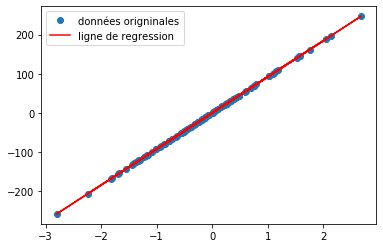

In [63]:
plt.plot(X, Y, 'o', label='données origninales')
plt.plot(X, intercept + slope*X, 'r', label='ligne de regression')
plt.legend()
plt.show()

#### - Avec l'algo de descente de  gradient

In [64]:
a =  92.0885587066296
b =  -5.055228828898247e-06

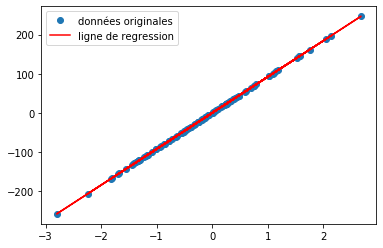

In [66]:
plt.plot(X, Y, 'o', label='données originales')
plt.plot(X, b + a*X, 'r', label='ligne de regression')
plt.legend()
plt.show()